# ÔN TẬP GIỮA KÌ

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('data/sales_data_sample.xlsx', sheet_name='saledata')
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164


### **TH01-02**: Hãy cho biết kích thước của dữ liệu

In [6]:
df.shape
# (2823, 25)

(2823, 10)

### **TH01-11**: Hãy cho biết hóa đơn 10107 có bao nhiêu dòng sản phẩm

In [7]:
df[df['ORDERNUMBER'] == 10107].shape
# (8, 25) -> 8 dòng sản phẩm trong đơn hàng có mã ORDERNUMBER = 10107

(8, 10)

### **TH01-10**: Hãy cho biết biểu đồ thể hiện trung bình số lượng sản phẩm trên từng nhóm DEALSIZE và STATUS. Thì nhóm STATUS nào có 2 cột thuộc nhóm status nào

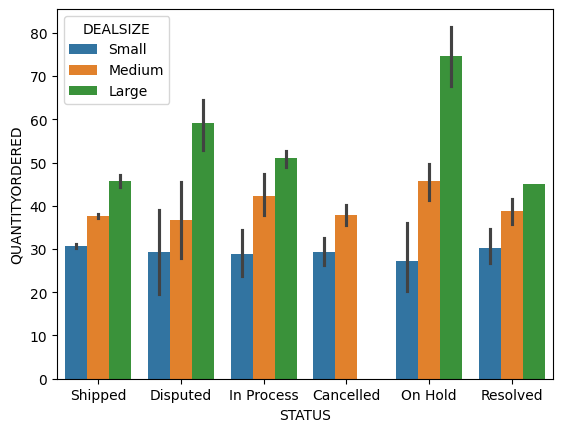

In [8]:
sns.barplot(x='STATUS', y='QUANTITYORDERED', hue='DEALSIZE', data=df)
plt.show()
# -> Cancelled

### **TH01-17**: Có mối liên hệ nào giữa trạng thái giao hàng(STATUS) và giá trị đặt hàng(SALE) hay không?

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('SALES ~ STATUS', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
STATUS       5.0  5.921801e+07  1.184360e+07  3.506652  0.003661
Residual  2817.0  9.514324e+09  3.377467e+06       NaN       NaN


- p-value: *0.003661 < 0.05* => Có mối liên hệ giữa Status và sales

### **TH01-22**: Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng thì yếu tố về kích thước đặt hàng có vai trò trong việc dự báo giá trị đặt hàng hay không?

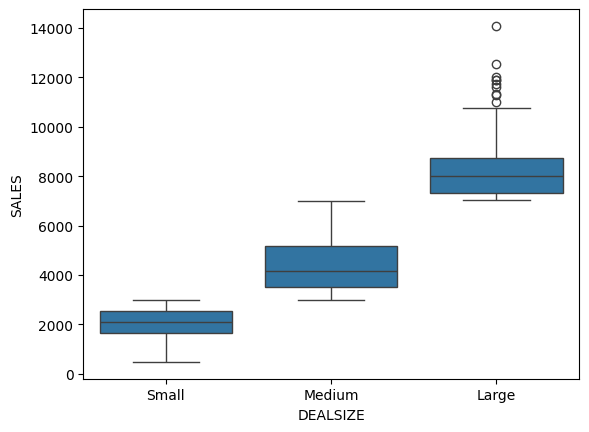

In [10]:
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.show()

- Vì các khoảng giá trị SALES trên từng nhóm DEALSIZE là khác nhau => DEALSIZE có là 1 yếu tố dự báo giá trị đặt hàng

### **TH01-23**: Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng, nếu có dữ liệu thiếu trên nhóm DEALSIZE = Medium thì dữ liệu thiếu đó nên được thay thế bằng:
  - a. Trung bình SALES của nhóm Small
  - b. Trung bình SALES của nhóm Large
  - c. Trung bình SALES của nhóm Medium
  - d. Trung bình giá trị SALES
  - e. Trung bình giá trị SALES của nhóm Small và Medium
  - f. Trung bình giá trị SALES của nhóm Large và Medium

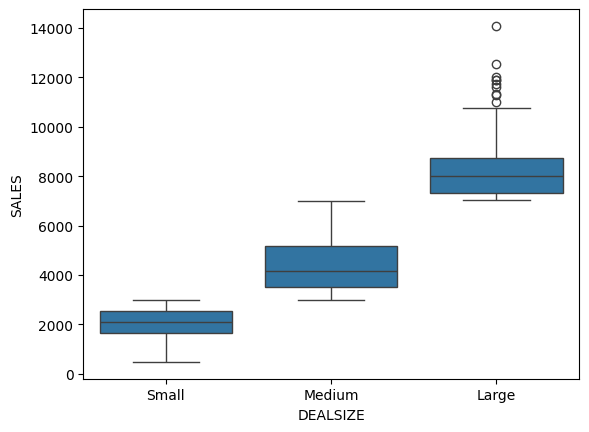

In [11]:
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.show()

- Tất cả các khoảng giá trị trong DEALSIZE trong biểu đồ boxplot đều khác nhau do đó: 
- Khi điền dữ liệu thiếu thì ta căn cứ vào dữ liệu Medium vì các khoảng giá trị trong các nhóm đều khác nhau.

### **TH01-31**: Nếu sử dụng One Hot Encoding để số hóa dữ liệu DEALSIZE thì kết quả của dùng cuối cùng là bao nhiêu?

In [12]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder().fit_transform(df[['DEALSIZE']]).toarray()
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


- Kết quả: **[0. 1. 0.]**

### **TH01-32**: Nếu sử dụng Max Absolute Scaler cho SALES thì giá trị có index = 100 được scale thành bào nhiêu?

In [16]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X = scaler.fit_transform(df[['SALES']])
print(X[100])

# X = maxabs_scale(df[['SALES']])
# print(X[100])

[0.21232496]


- Đáp án: **0.21232496**

### **TH01-38**: Hãy sắp xếp giảm dần theo cho mức độ lệch của SALES sau khi được transform lần lượt qua hàm log, sqrt, square và cube root
  - a. square, chưa transform, sqrt, cube root, log
  - b. chưa transform, sqrt, cube root, log, square
  - c. square, chưa transform, cube root, log, sqrt
  - d. sqrt, cube root, log, square, chưa transform

In [18]:
import numpy as np

print(f"chưa transform : {df['SALES'].skew()}")
print(f"log : {np.log(df['SALES']).skew()}")
print(f"sqrt : {np.sqrt(df['SALES']).skew()}")
print(f"square : {np.square(df['SALES']).skew()}")
print(f"cube sqrt : {np.cbrt(df['SALES']).skew()}")

chưa transform : 1.161076000881289
log : -0.2021742362869817
sqrt : 0.47281500087876144
square : 2.915766495908139
cube sqrt : 0.25086487312083416


- Đáp án **a**

### TH01-39: Hãy tính gía trị lệch của SALES sau khi được transform qua hàm f(x) = 1/(log(x)^2+1)

0.7679976616615047


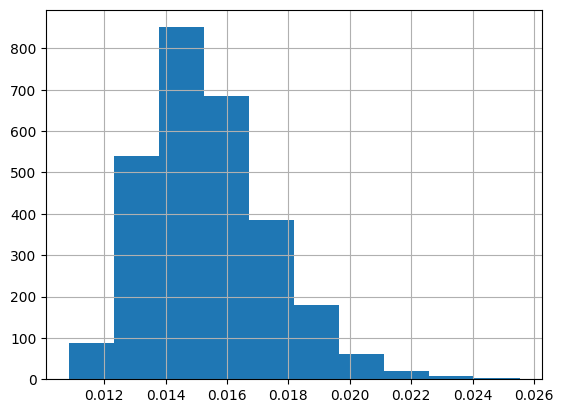

In [21]:
transformed = 1 / (np.square(np.log(df['SALES'])) + 1)
print(transformed.skew())


transformed.hist()
plt.show()